In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import unittest
import matplotlib as mpl
import matplotlib.ticker as mticker
from pandas.plotting import register_matplotlib_converters
from datetime import datetime

In [4]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(r"C:\Users\user\Downloads\fcc-forum-pageviews.csv", parse_dates = ["date"], index_col = "date")

In [5]:
#cleaning the data
df = df[
(df["value"] >= df["value"].quantile(0.025))&
(df["value"] <= df["value"].quantile(0.975))]

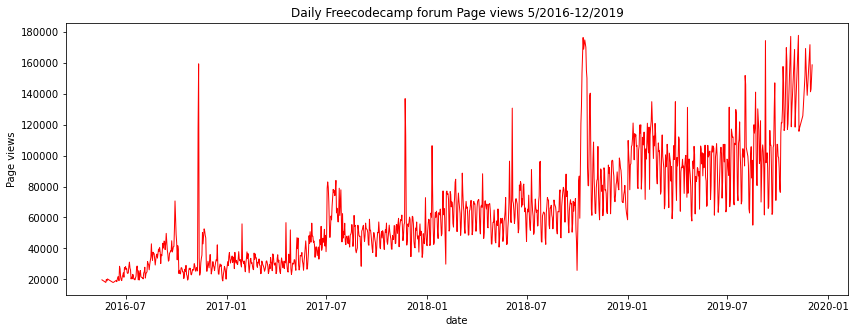

In [26]:
# Draw line plot
fig, ax = plt.subplots(figsize = (14,5))
ax.plot(df.index,df["value"], 'r', linewidth = 1 )

ax.set_title("Daily Freecodecamp forum Page views 5/2016-12/2019")
ax.set_xlabel("date")
ax.set_ylabel("Page views")
plt.show()

In [21]:
fig.savefig('lineplot.png')

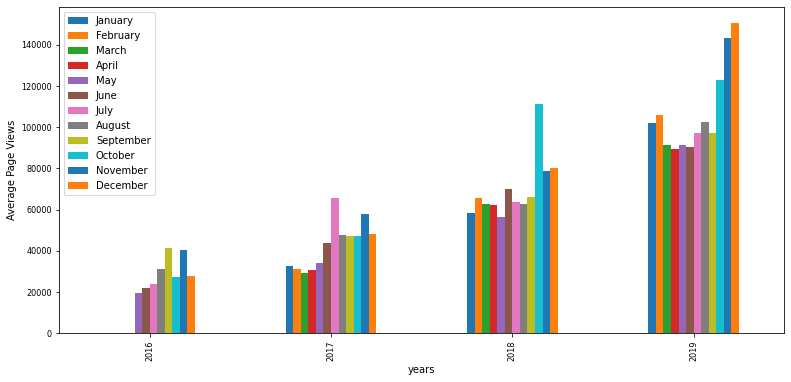

In [11]:
# Copy and modify data for monthly bar plot
df["month"]=df.index.month
df["year"]=df.index.year
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()
# Draw bar plot
fig = df_bar.plot.bar(legend=True,figsize=(13,6),ylabel="Average Page Views", xlabel ="years",).figure
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'])
    
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [22]:
fig.savefig('barplot.png')

In [13]:
 # Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
df_box ["month_num"]=df_box["date"].dt.month
df_box= df_box.sort_values("month_num")

fig, axes= plt.subplots(nrows=1,ncols=1,figsize=(10,5))

axes[0] = sns.boxplot(x=df_box['year'],y=df_box["value"],ax= axes[0])
axes[1] = sns.boxplot(x=df_box['month'],y=df_box["value"],ax= axes[1])

axes[0].set_title("Year-wise Box plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

axes[1].set_ylabel("Month-wise Box plot (Seasonality)")
axes[1].set_ylabel("Month")
axes[1].set_ylabel("Page Views")
plt.show()

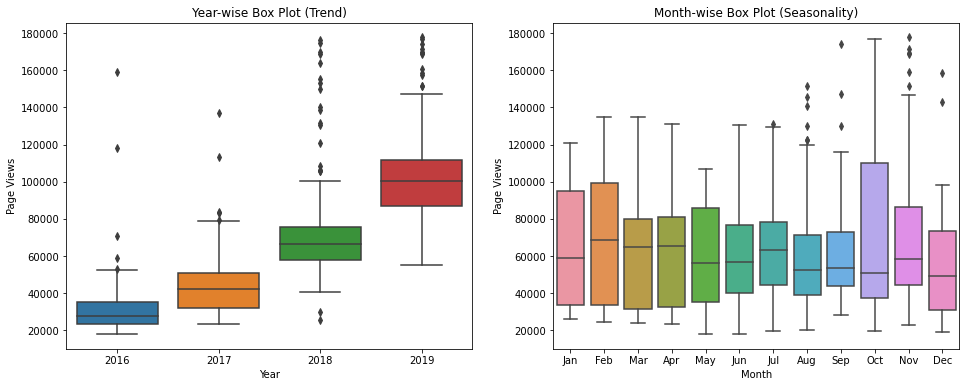

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["value"])
ax1.set(
        xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
sns.boxplot(
        ax=ax2,
        data=df_box,
        x=df_box["month"],
        y=df_box["value"],
        order=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
    )

ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")
y_ticks = [
        "0",
        "20000",
        "40000",
        "60000",
        "80000",
        "100000",
        "120000",
        "140000",
        "160000",
        "180000",
        "200000",
    ]
ax1.yaxis.set_major_locator(mticker.FixedLocator([int(s) for s in y_ticks]))
ax1.set_yticklabels(y_ticks)
plt.show()

In [ ]:
fig.savefig('boxplot.png')